In [1]:
from imports import *
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# get planet data
names, mps, emps, rps, erps = mr.MR_planets()
sort = np.argsort(names)
names, mps, emps, rps, erps = names[sort], mps[sort], emps[sort], rps[sort], erps[sort]

In [3]:
# label exoplanets by a number
SS_names = np.array(['Venus','Earth','Uranus','Neptune'])
nums = np.zeros(names.size)
nums[np.in1d(names, SS_names, invert=True)] = np.arange(1,names.size-3)

In [18]:
# get collisional stripping limit
mpM, rpM = np.loadtxt('input_data/Marcusetal2010_strippingdata.csv', delimiter=',').T

In [4]:
# Get interior models
m1, r1 = mr.MR_MgSiO3H2O_curves(0)
m2, r2 = mr.MR_MgSiO3H2O_curves(.25)
m3, r3 = mr.MR_MgSiO3H2O_curves(.5)
m4, r4 = mr.MR_MgSiO3H2O_curves(.75)
m5, r5 = mr.MR_MgSiO3H2O_curves(1)
m6, r6 = mr.MR_FeMgSiO3_curves(.5)
m7, r7 = mr.MR_FeMgSiO3_curves(1)
Mmodels, Rmodels = np.array([m1,m2,m3,m4,m5,m6,m7]).reshape(7,m1.size), \
np.array([r1,r2,r3,r4,r5,r6,r7]).reshape(7,r1.size)
model_labels = ['100% H$_2$O','25% MgSiO$_3$ - 75% H$_2$O', '50% MgSiO$_3$ - 50% H$_2$O','75% MgSiO$_3$ - 25% H$_2$O',\
                '100% MgSiO$_3$','50% Fe - 50% MgSiO$_3$','100% Fe']

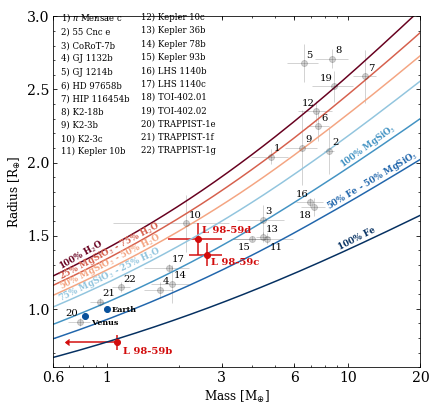

In [86]:
# plotting
fig = plt.figure(figsize=(6,5.6))
ax = fig.add_subplot(111)

# plot interior curve
cols = ['#67001f','#d6604d','#f4a582','#92c5de','#4393c3','#2166ac','#053061']
#xs, dy, rot = np.array([2.6,2.6,2.6,2.6,9,7.6,9]), \
#              np.array([1.2e-2,1.3e-2,7e-3,5e-3,3e-2,2e-2,2e-2]), \
#              np.array([41,38,36,34,36,32,27])
xs, dy, rot = np.array([.62,.62,.62,.62,9,8,9]), \
              np.array([1.2e-2,1.3e-2,7e-3,5e-3,3e-2,2e-2,2e-2]), \
              np.array([30,28,27,26,36,31,27])
for i in range(7):
    ax.plot(Mmodels[i], Rmodels[i], '-', c=cols[i])
    ax.text(xs[i], Rmodels[i][abs(Mmodels[i]-xs[i])==abs(Mmodels[i]-xs[i]).min()]+dy[i],
            model_labels[i], color=cols[i], fontsize=8.5, rotation=rot[i],
            verticalalignment='bottom', weight='bold')
    
# plot collisional stripping curve
#ax.plot(mpM, rpM, 'k-')
    
# plot SS planets
SSplanets = np.where(np.in1d(names, SS_names[:2]))[0]
for i in SSplanets:
    ax.errorbar(mps[i], rps[i], xerr=emps[i], yerr=erps[i], fmt='o',
                capsize=0, elinewidth=1, c='#08519c')
    dy = -.06 if names[i] == 'Venus' else -.02
    ax.text(mps[i]+.05, rps[i]+dy, names[i], horizontalalignment='left', fontsize=8, weight='bold')

# plt exoplanets
exoplanets = np.where(np.in1d(names, SS_names, invert=1))[0]
xinvert = [20,15,18,16,12,19]
yinvert = [18,15,11]
for i in range(exoplanets.size):
    ax.errorbar(mps[exoplanets][i], rps[exoplanets][i], xerr=emps[exoplanets][i], 
                yerr=erps[exoplanets][i], fmt='o', capsize=0, elinewidth=1, c='#252525', alpha=.2)
    dx = -.06 if i+1 in xinvert else .01
    dy = -.075 if i+1 in yinvert else .04
    ax.text(10**(np.log10(mps[exoplanets][i])+dx), rps[exoplanets][i]+dy, i+1)
    ax.plot([0], [0], 'o', ms=0, label='%i) %s'%(i+1, names[exoplanets][i]))
    
# plot TOI-175 planets
col = '#d20c0c'
ax.errorbar([2.6,2.4], [1.37,1.48], xerr=[.4,.6], yerr=[.08,.11], fmt='o', color=col, capsize=0)
ax.errorbar([1.1], [.77], xerr=([.4],[0]), yerr=[.05], fmt='o', color=col, xuplims=True, capsize=0)
ax.text(2.7, 1.3, 'L 98-59c', weight='semibold', fontsize=10, color=col)
ax.text(2.48, 1.52, 'L 98-59d', weight='semibold', fontsize=10, color=col)
ax.text(1.17, .69, 'L 98-59b', weight='semibold', fontsize=10, color=col)
    
ax.set_xscale('log')
ax.set_xlim((.6,20)), ax.set_ylim((.6,3))
ax.set_xlabel('Mass [M$_{\oplus}$]', fontsize=12), ax.set_ylabel('Radius [R$_{\oplus}$]', fontsize=12)
ax.set_xticks([.6,1,3,6,10,20]), ax.set_xticklabels([.6,1,3,6,10,20])

plt.minorticks_on()
plt.legend(bbox_to_anchor=[.464,.58], ncol=2, columnspacing=-1.5, frameon=False, fontsize=8.5)
plt.subplots_adjust(bottom=.09, left=.11, right=.96, top=.96)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/MRplot.png')